In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pickle
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

In [2]:
bow = pd.read_csv("../System/bow_train.csv")
labels = bow["class"]
bow.drop('class', axis=1, inplace=True)

bop = pd.read_csv("../System/bop_train.csv")
bop.drop('class', axis=1, inplace=True)

bos = pd.read_csv("../System/bos_train.csv")
bos.drop('class', axis=1, inplace=True)

In [3]:
def get_svc_weights(feats):
    CLF = LinearSVC()
    K_FOLDS = 10

    pipeline = Pipeline([
            ('normalizer', StandardScaler()),  # Step1 - normalize data
    #         ('normalizer', RobustScaler(quantile_range=(25, 75))),  # Step1 - normalize data
            ('clf', CLF)  # Step2 - classifier
            ])
    
    pipeline.fit(feats, labels)
    a = 0
    
    svc_coeffs = CLF.coef_.ravel()

    rank_pd = pd.DataFrame()
    rank_pd['Weights'] = svc_coeffs
    rank_pd['Features'] = feats.columns.values
    rank_pd.set_index("Features", inplace=True)
    sorted_ranks = rank_pd.sort_values(by='Weights', ascending=False)
    return sorted_ranks

In [4]:
a = 0

Bag of Words Weights

[]

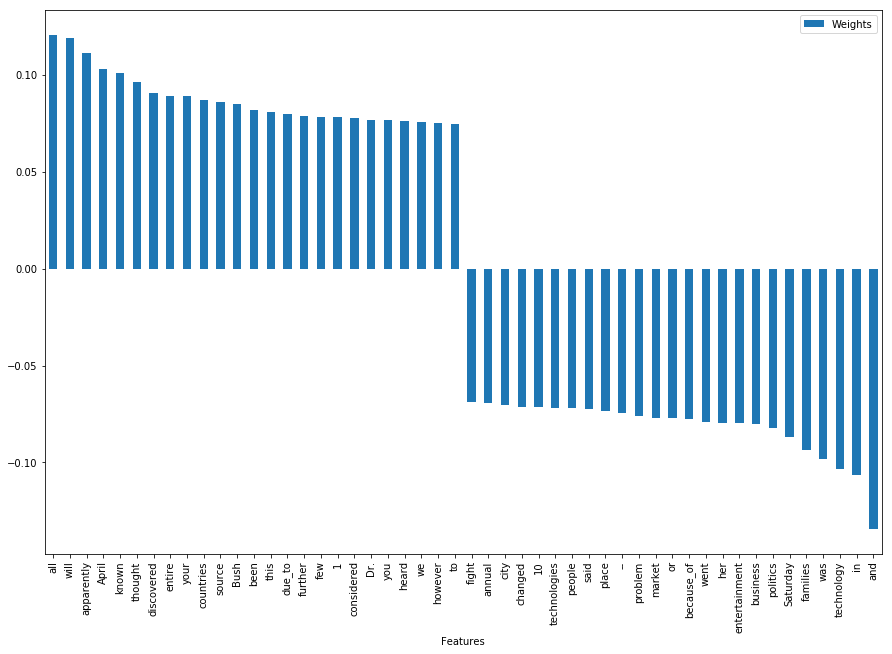

In [5]:
ranks = get_svc_weights(bow)
top_ranks = ranks.iloc[np.r_[0:25, -25:0]]
top_ranks.plot.bar(figsize=(15,10))
plt.plot()

In [6]:
# Sort the data by absolute value of svm weight
sorted_data = ranks.assign(f=abs(ranks['Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
# print(sorted_data.head(10).to_latex())
sorted_data

,Weights
Features,
and,-0.134442
all,0.120665
will,0.118911
apparently,0.111340
in,-0.106256
technology,-0.103531
April,0.103209
known,0.101296
was,-0.097944



Bag of Part of Speech Weights

[]

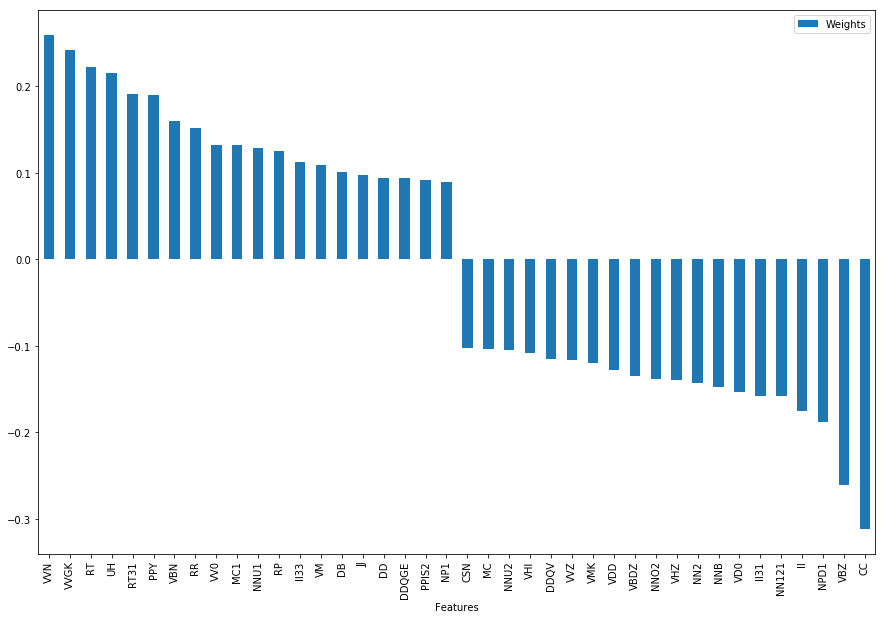

In [7]:
ranks = get_svc_weights(bop)
top_ranks = ranks.iloc[np.r_[0:20, -20:0]]
top_ranks.plot.bar(figsize=(15,10))
plt.plot()

In [8]:
# Sort the data by absolute value of svm weight
sorted_data = ranks.assign(f=abs(ranks['Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
# print(sorted_data.head(10).to_latex())
sorted_data

,Weights
Features,
CC,-0.311517
VBZ,-0.260609
VVN,0.259891
VVGK,0.241741
RT,0.222592
UH,0.215234
RT31,0.190834
PPY,0.189978
NPD1,-0.188172


Bag of Semantic Tags Weights

[]

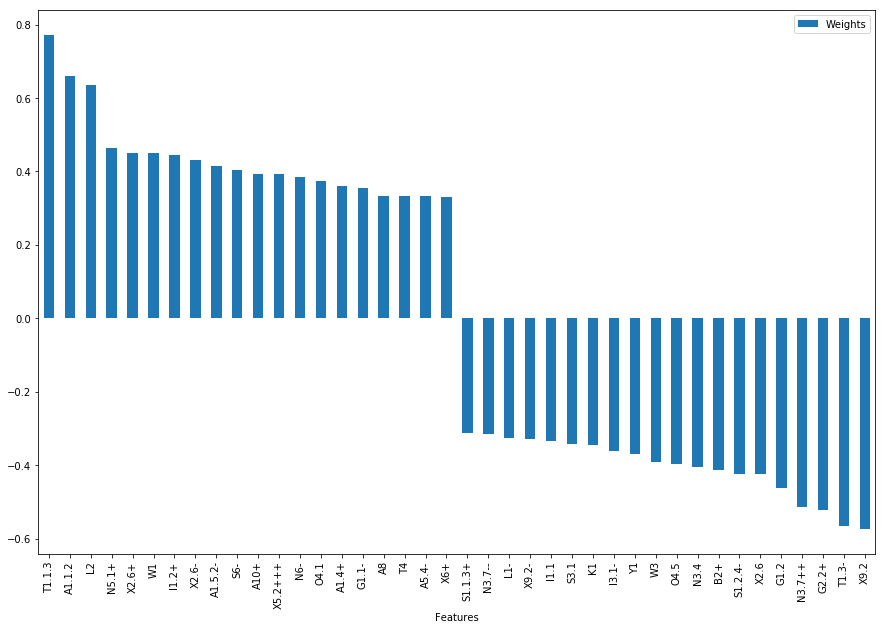

In [9]:
ranks = get_svc_weights(bos)
top_ranks = ranks.iloc[np.r_[0:20, -20:0]]
top_ranks.plot.bar(figsize=(15,10))
plt.plot()

In [10]:
# Sort the data by absolute value of svm weight
sorted_data = ranks.assign(f=abs(ranks['Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
# print(sorted_data.head(10).to_latex())
sorted_data

,Weights
Features,
T1.1.3,0.771708
A1.1.2,0.661074
L2,0.634964
X9.2,-0.573217
T1.3-,-0.565454
G2.2+,-0.521712
N3.7++,-0.512622
N5.1+,0.464100
G1.2,-0.460460
